# Topology

In this section, we'll explore some foundational abstract concepts that form the basis for understanding ideas like maximum and minimum in various contexts.

We’ll begin with rigorous definitions and provide intuition to help build an intuitive feel for these concepts.

Let $S$ be a subset of $H$ a Hilbert space.

* $S$ is bounded if it's included in a ball.
Which simply means that all elements of $S$ is element of that ball, more formally: $∀$ $x$ $∈$ $S$, $∃$ $r > 0$ $\|x - x_0\|$ $<$ $r$, where $x_0$ is the center of that ball.

Let's visualize that:

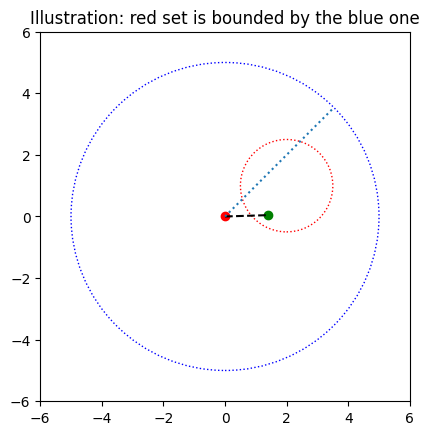

In [3]:
import matplotlib.pyplot as plt
import numpy as np

x0 = np.array([0, 0])  # Center of large circle
R = 5  # Radius of large circle

x = np.array([2, 1])   # Center of small circle
r = 1.5                # Radius of small circle

fig, ax = plt.subplots()

large_circle = plt.Circle(x0, R, color='blue', linestyle=':', fill=False)
ax.add_artist(large_circle)

small_circle = plt.Circle(x, r, color='red', linestyle=':', fill=False)
ax.add_artist(small_circle)

theta = np.random.uniform(0, 2 * np.pi)
r_prime = r * np.sqrt(np.random.uniform(0, 1))
y = np.array([x[0] + r_prime * np.cos(theta), x[1] + r_prime * np.sin(theta)])  #random point in the small set
ax.plot(y[0], y[1], 'go')

ax.plot(x0[0], x0[1], 'ro')
ax.plot([x0[0], y[0]], [x0[1], y[1]], 'k--')

angle = np.pi / 4
boundary_point = x0 + R * np.array([np.cos(angle), np.sin(angle)])
ax.plot([x0[0], boundary_point[0]], [x0[1], boundary_point[1]], ':')

ax.set_aspect('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)

plt.title("Illustration: red set is bounded by the blue one")
plt.grid(False)
plt.show()

You just saw an illustration of the formula above!

* $S$ is closed if any sequence of elements of $S$ converges to a limit $l$ $∈$ $S$.

What that means is that $S$ is built such as no element of it "can't escape" and contain all of its elements ensuring that no element that can be approached by other elements of $S$ is excluded for $S$, in a more formal you can't find any ball in the complement of $S$: $H$ $\setminus$ $S$ such that:

$B(x_0, r)$ $\cap$ $S$ $\neq$ $\emptyset$.


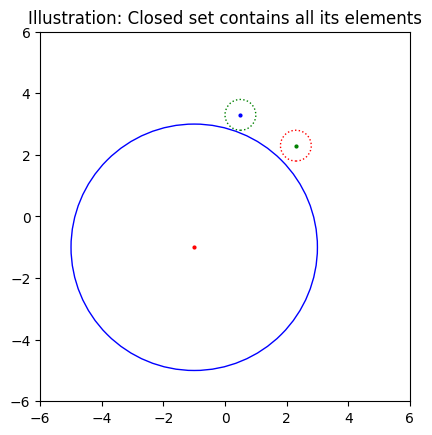

In [2]:
x0 = np.array([-1, -1])  # Center of the closed ball (we can prove mathematically that it's a closed set)
r = 4 # Radius o the ball

x = np.array([2.3, 2.3]) # Center of the ball in the complement
r_prime = 0.5

x_prime = np.array([0.5, 3.3])
r_prime_prime = 0.5

fig, ax = plt.subplots()
closed_ball = plt.Circle(x0, r, color='blue', linestyle='-', fill=False)
ax.add_artist(closed_ball)

complement_ball = plt.Circle(x, r_prime, color='red', linestyle=':', fill=False)
ax.add_artist(complement_ball)

complement_ball_prime = plt.Circle(x_prime, r_prime_prime, color='green', linestyle=':', fill=False)
ax.add_artist(complement_ball_prime)


ax.plot(x0[0], x0[1], 'ro', markersize=2)
ax.plot(x[0], x[1], 'go', markersize=2)
ax.plot(x_prime[0], x_prime[1], 'bo', markersize=2)

ax.set_aspect('equal')
plt.xlim(-6, 6)
plt.ylim(-6, 6)

ax.set_title("Illustration: Closed set contains all its elements")
plt.grid(False)
plt.show()

* $S$ is a compact if for every sequence $(x_n)_{n∈\mathbb{N}}$, one can extract a subsequence $(x_{n_k})_{k \in \mathbb{N}}$ that is convergente in $S$.

This is by far the most important and difficult to grasp as a concept, since if a set $S$ is compact then it is a bounded closed set (converse is true if $H$ is finite dimensional).

Let's dive into the meaning of the compactness:
For a finite dimensional $S$ is compact if and only if:
* $S$ is complete.
* $S$ is Bounded.

$>$ $S$ is compact if every open cover has a finite subcover. An open cover is a collection of open sets whose union contains the entire space $S$. In other words if there exists a collection of open sets that together cover $S$ then it's overcovering it.

For an infinite dimensional $S$:

The property you wanna include is Total boundedness:
* for every $ϵ$ $> 0$, $S$ can be bounded by a finite number of balls of radius $ϵ$.

Let's visualize this:

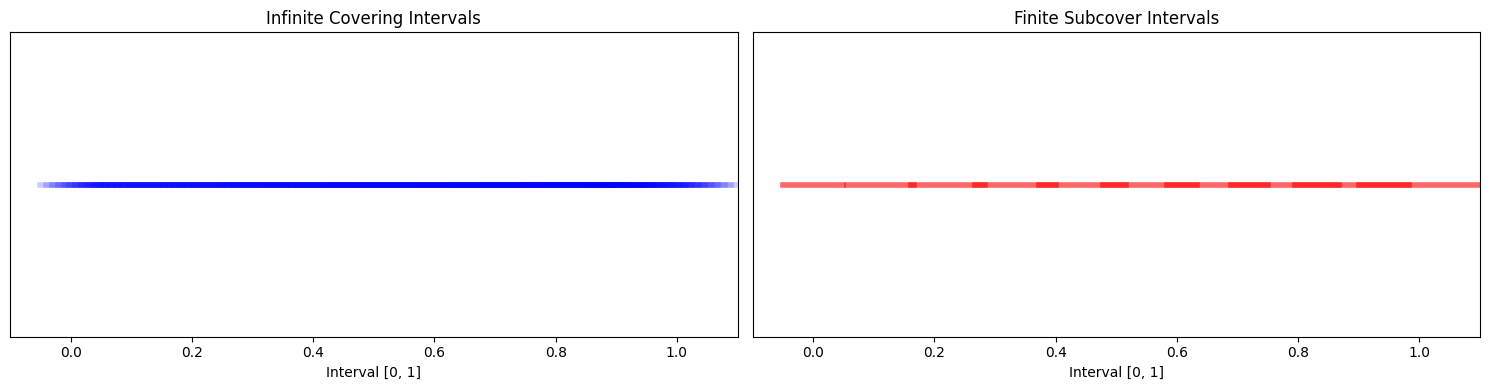

In [11]:
num_intervals_infinite = 100
num_intervals_finite = 10
interval_start, interval_end = 0, 1

points_infinite = np.linspace(interval_start, interval_end, num_intervals_infinite)
epsilon_values = np.linspace(0.05, 0.1, num_intervals_infinite)

finite_indices = np.round(np.linspace(0, num_intervals_infinite - 1, num_intervals_finite)).astype(int)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

for center, epsilon in zip(points_infinite, epsilon_values):
    left, right = center - epsilon, center + epsilon
    ax1.plot([left, right], [1, 1], color="blue", alpha=0.2, linewidth=4)

ax1.set_xlim(-0.1, 1.1)
ax1.set_ylim(0, 2)
ax1.set_yticks([])
ax1.set_xlabel("Interval [0, 1]")
ax1.set_title("Infinite Covering Intervals")

for i in finite_indices:
    center, epsilon = points_infinite[i], epsilon_values[i]
    left, right = center - epsilon, center + epsilon
    ax2.plot([left, right], [1, 1], color="red", alpha=0.6, linewidth=4)

ax2.set_xlim(-0.1, 1.1)
ax2.set_ylim(0, 2)
ax2.set_yticks([])
ax2.set_xlabel("Interval [0, 1]")
ax2.set_title("Finite Subcover Intervals")

plt.tight_layout()
plt.show()
